# EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
# from sklearn.preprocessing import MinMaxScaler, StandardScaler
# from sklearn.decomposition import PCA
from skfuzzy import cmeans

In [15]:
# Load datasets
red_wine = pd.read_csv('winequality-red.csv', sep=';')
white_wine = pd.read_csv('winequality-white.csv', sep=';')

# Add a column to identify wine type
red_wine['wine_type'] = 0
white_wine['wine_type'] = 1

print('Red wine shape', red_wine.shape)
print('White wine shape', white_wine.shape)

Red wine shape (1599, 13)
White wine shape (4898, 13)


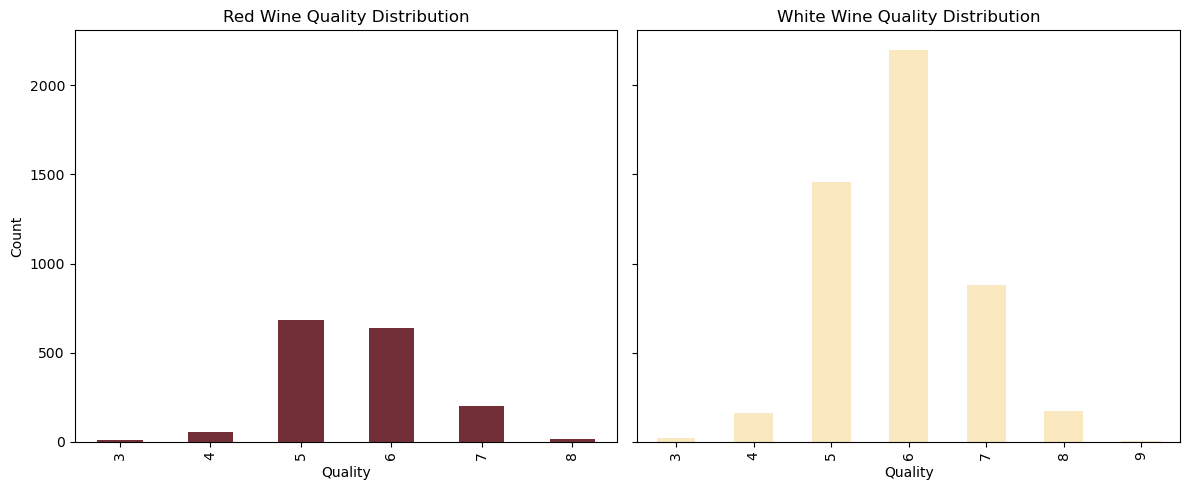

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)  # 1 row, 2 columns

red_wine['quality'].value_counts().sort_index().plot(kind='bar', ax=axes[0], color='#722F37')
axes[0].set_title('Red Wine Quality Distribution')
axes[0].set_xlabel('Quality')
axes[0].set_ylabel('Count')

white_wine['quality'].value_counts().sort_index().plot(kind='bar', ax=axes[1], color='#f9e8c0')
axes[1].set_title('White Wine Quality Distribution')
axes[1].set_xlabel('Quality')

plt.tight_layout()
plt.show()

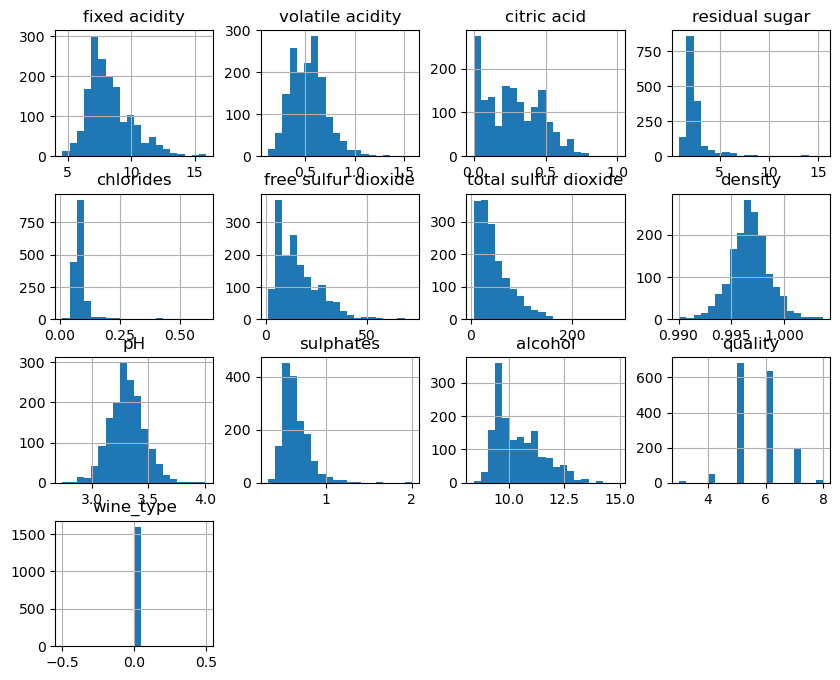

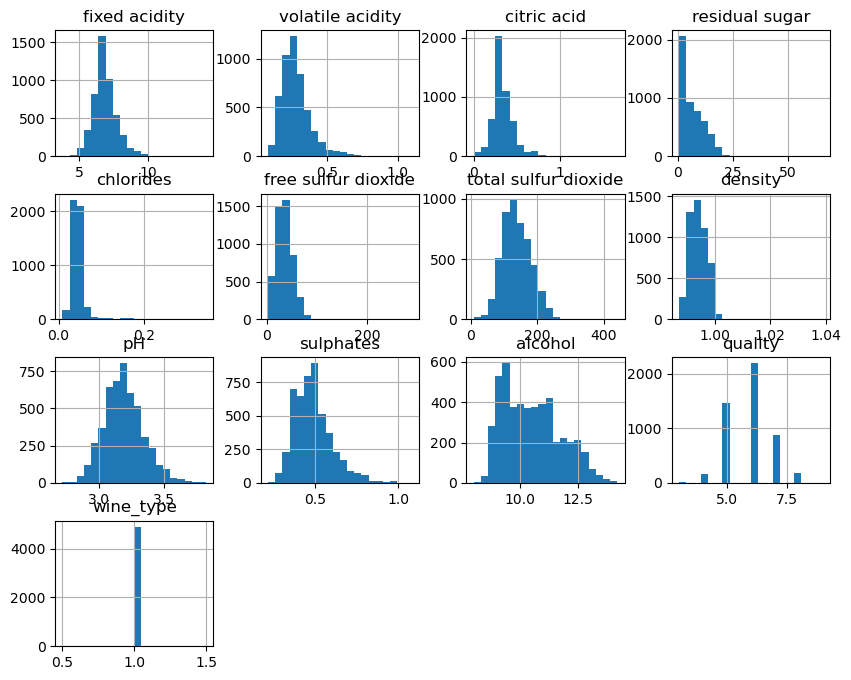

In [ ]:
# CHANGE DISPLAY TO UNDERSTAND DIFFERENCES BETTER (like above)

red_wine.hist(figsize=(10,8), bins=20)
plt.show()

white_wine.hist(figsize=(10,8), bins=20)

plt.show()

In [26]:
# Combine datasets
data = pd.concat([red_wine, white_wine])

data.head(-1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4892,6.5,0.23,0.38,1.3,0.032,29.0,112.0,0.99298,3.29,0.54,9.7,5,1
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1


In [27]:
print('Dataset shape:', data.shape)
print('Dataset has', data.shape[0],'data points and', data.shape[1], 'features.')
print("Dataset number of array dimensions: ", data.ndim)
print("Dataset number of elements: ", data.size)

Dataset shape: (6497, 13)
Dataset has 6497 data points and 13 features.
Dataset number of array dimensions:  2
Dataset number of elements:  84461


In [28]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB
None


In [29]:
print(data.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

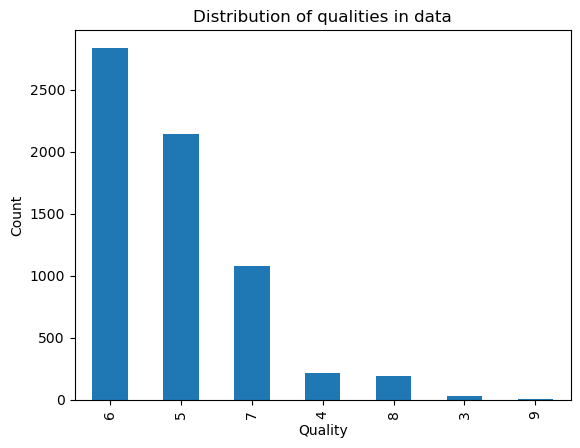

In [25]:
data['quality'].value_counts().plot(kind='bar')

# Adding titles and labels
plt.title('Distribution of qualities in data')
plt.xlabel('Quality')
plt.ylabel('Count')

# Display the plot
plt.show()

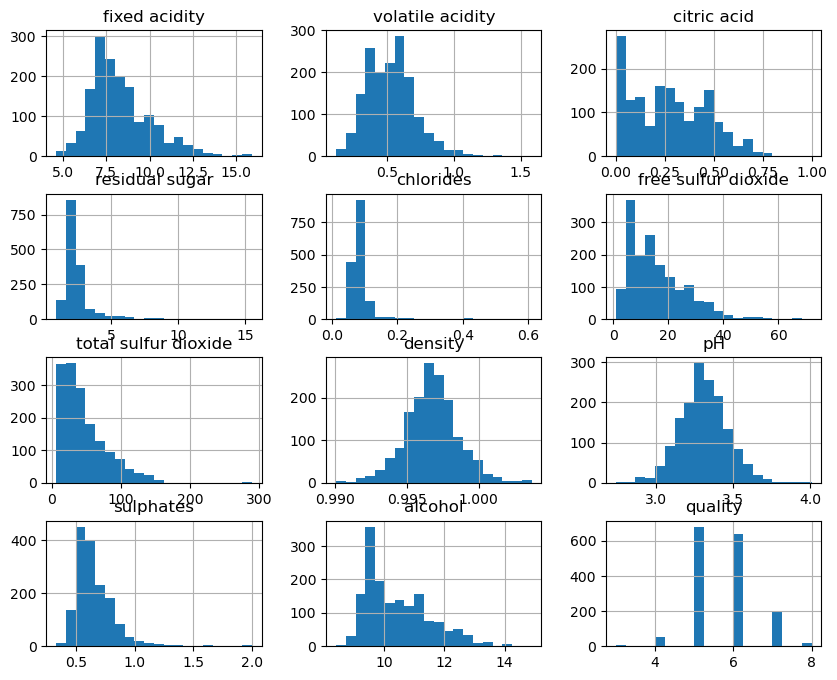

In [8]:
# Histograms
data.hist(figsize=(10,8), bins=20)
plt.show()

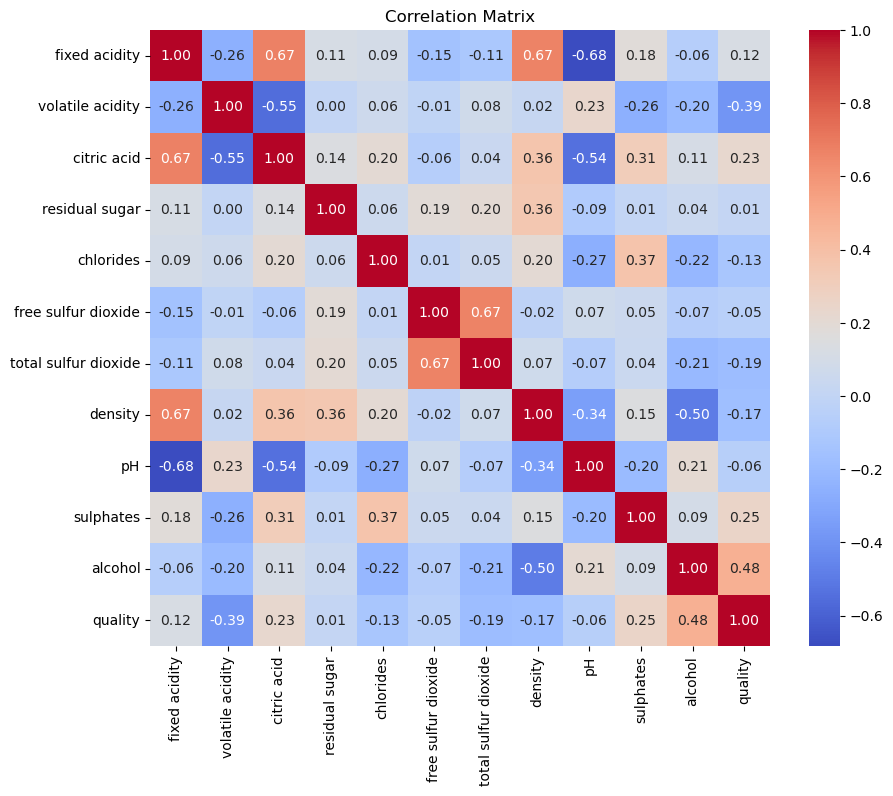

In [9]:
# Correlation Matrix
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

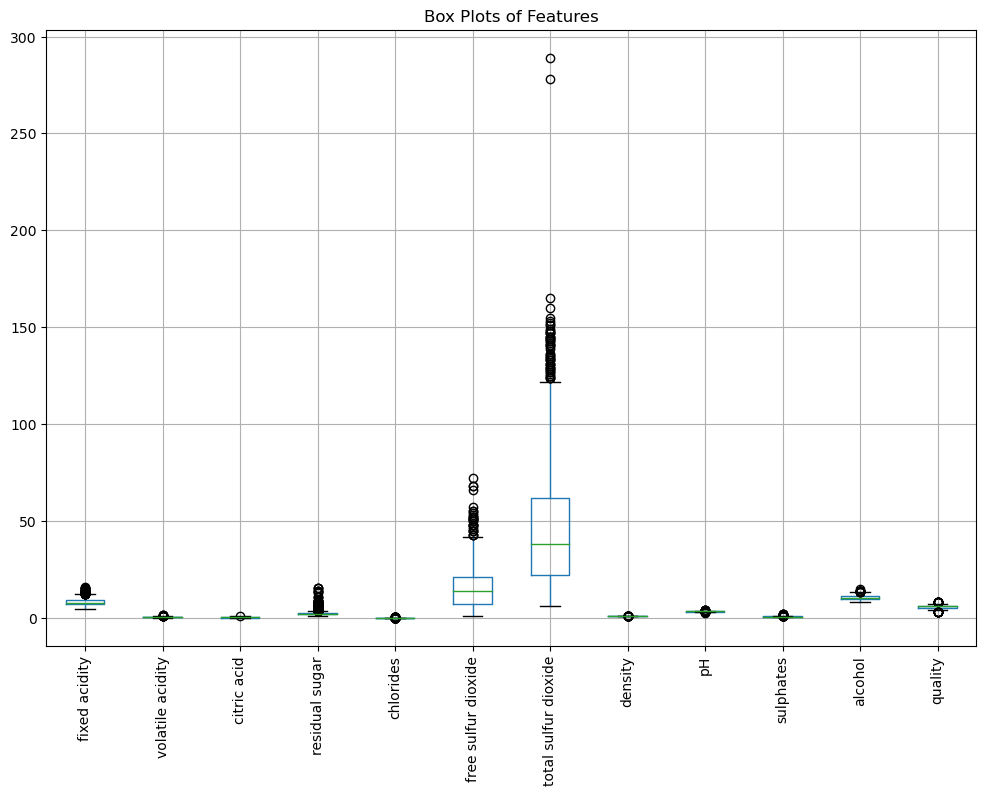

In [10]:
# Box Plots
plt.figure(figsize=(12,8))
data.boxplot(rot=90)
plt.title("Box Plots of Features")
plt.show()